In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
TRAIN_DIR = r'D:\CIFAR-10-images-master\CIFAR-10-images-master\train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
class_num = CATEGORIES.index(c)
print(class_num)

9


In [7]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1566.40it/s]

50000


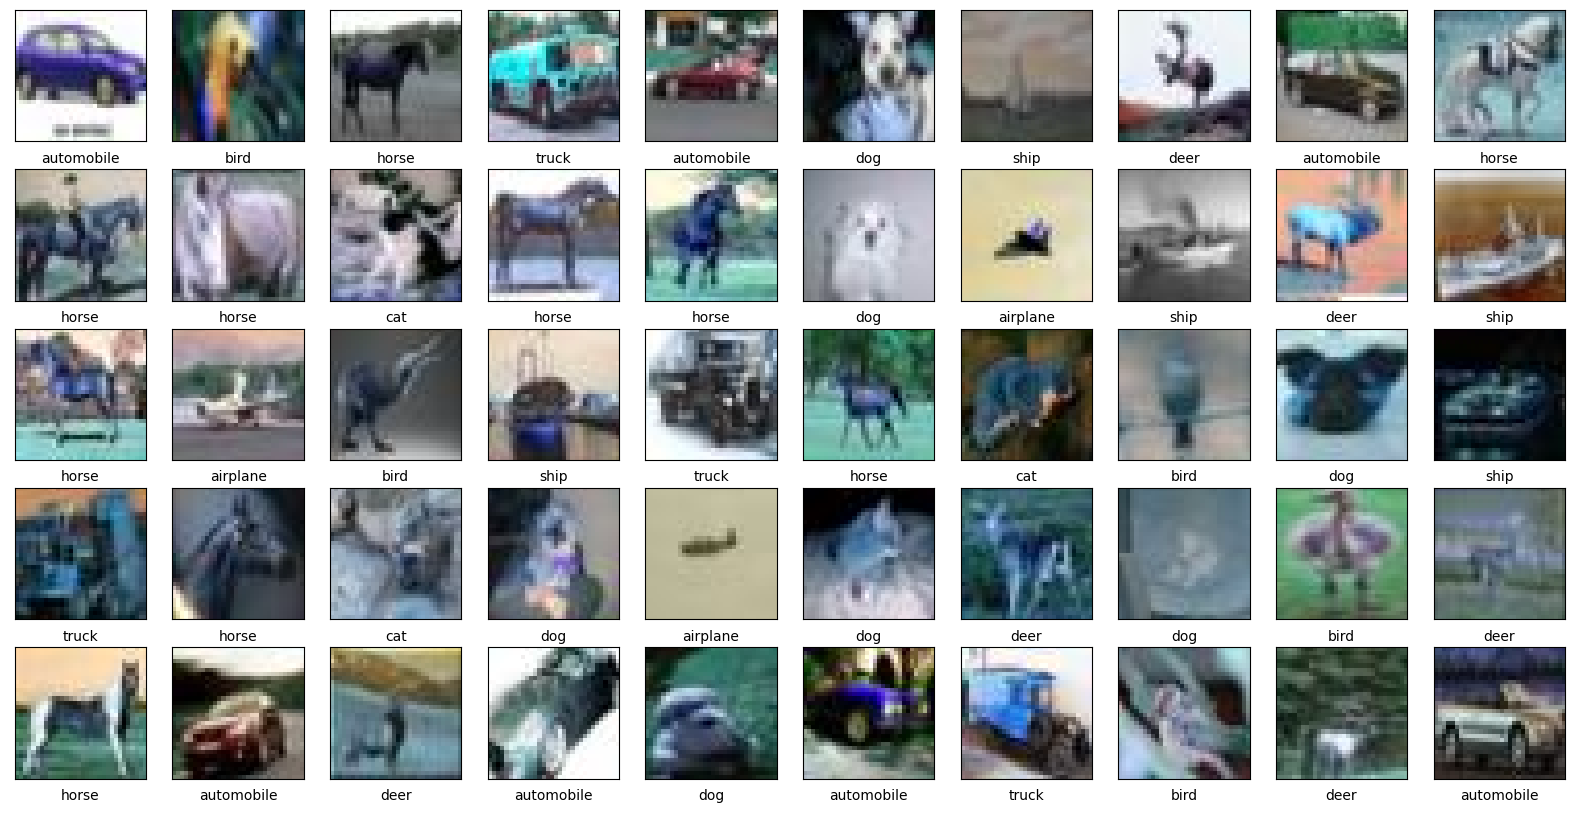

In [8]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [9]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [ ]:
import math 
 

A1=[]
A2=[]
K=[3,2,5,7,8]

for i in range(5):
    total_acc1 = []
    total_acc2 = []
    
    if i==0:
        train = f1+f2+f3+f4
        validation = f0 
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f1+f0+f3+f4
        validation = f2
    elif i==3:
        train = f1+f2+f0+f4
        validation = f3
    elif i==4:
        train = f1+f2+f3+f0
        validation = f4
        

    for k in K:
        acc1=0
        acc2=0
        for v in tqdm(validation):
            scores1 = []
            scores2 = []
            for t in train:
                l2_dist = np.sum(np.sqrt(t[0]**2-v[0]**2))
                scores1.append([l2_dist,t[1]])

                l1_dist = np.sum(t[0]-v[0])
                scores2.append([l1_dist,t[1]])
            sorted_scores1 = sorted(scores1, key=lambda a: a[0])
            sorted_scores2 = sorted(scores2, key=lambda a: a[0])

            top_k1 = [sorted_scores1[i][1] for i in range(k)]
            top_k2 = [sorted_scores2[i][1] for i in range(k)]
            pred_label1 = max(set(top_k1), key=top_k1.count)
            pred_label2 = max(set(top_k2), key=top_k2.count)

            true_label = v[1]
            if pred_label1 == true_label:
                acc1 += 1
            if pred_label2 == true_label:
                acc2 += 1



        accuracy1 = a1 / len(validation) * 100
        accuracy2 = a2 / len(validation) * 100
        print(f"L2 Accuracy: {accuracy1:.2f}%")
        print(f"L1 Accuracy: {accuracy2:.2f}%")
        total_a1.append(accuracy1)
        total_a2.append(accuracy2)

    midPoint2 = sum(total_a2)/5
    midPoint1 = sum(total_a1)/5
    A1.append(midPoint1)
    A2.append(midPoint2)

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)

ax1.plot(K,midPointAcc1,label=' L1')
ax1.set_xlabel('M')
ax1.set_ylabel('Avg Accuracy')
ax1.legend(loc='best')

ax2.plot(K,midPointAcc2,label=' L2')
ax2.set_xlabel('M')
ax2.set_ylabel('Avg Accuracy')
ax2.legend(loc='best')

plt.title('Predict')

plt.tight_layout()
plt.show()


 87%|████████████████████████████████████████████████████████████████████▍          | 867/1000 [07:41<01:15,  1.76it/s]